# Problem 1

* The file city-distances-sweden.csv provides pariwise, geodesic distances between 34 Swedish cities,
and the corresponding names are in the file city-names-sweden.csv. 
* Based on these distances, we will
in the following exercises estimate the coordinates of these cities relative to each other. 


### Problem 1 A
* Describe the main difference between feature extraction and feature selection.
* Describe the multidimensional scaling (MDS) algorithm and comment on its areas of use.

## Answer
Both feature extraction and feature selection are methods used to reduce the number of features in a dataset. But there are some differences...

#### Feature selection
  Feature selection involves choosing a subset of the original features in the dataset without altering them. The goal is to remove irrelevant or redundant features, by retaining the most important ones. 

  EX: If i have 100 features in my dataset, i can apply feature selection algorithm to select the top 20 features based on their importance. (correlation analysis, mutual information etc.)

  * Can improve performance 
  * Helps prevent over-fitting
  * Simplifies the model


#### Feature extraction
  Feature extraction involves creating new features from the original ones by transforming them onto a lower-dimensional space. 
  It combines or compresses the existing features to produce new features that summarize the original data. 

  EX: A common feature extraction technique is `Principal Component Analysis` (PCA), 
  which transforms the original features into a new set of uncorrelated features called principal components that are 
  linear combos of the original features.


  * More effective for reducing dimensionality as it can compress information from multiple features into a smaller number of features
  * Helps improve the performance

#### Multidimensional scaling (MDS) 
MDS is a technique used for visualizing the similarity or dissimilarity between data points in a lower-dimensional space, usually 2D or 3D.
The goal of MDS is to represent high-dimensional data points as faithfully as possible in fewer dimensions based in pairwise distances between data points. 

#### How it works
`Input` MDS takes as input a matrix of pairwise distances between points. These distances could be physical distances, similarity scores, or any metric representing how different data points are.

`Objective` MDS tries to place each data point in a lower-dimensional space (2D or 3D)

#### Types of MDS:

`Classical MDS`: Uses eigenvalue decomposition to find the optimal configuration.

`Non-metric MDS`: Tries to preserve the rank order of distances rather than exact distances.

`Metric MDS`: Focuses on preserving the exact distances between points.



### Problem 1 B Explain how you will use the provided distances to obtain the B = XTX matrix.

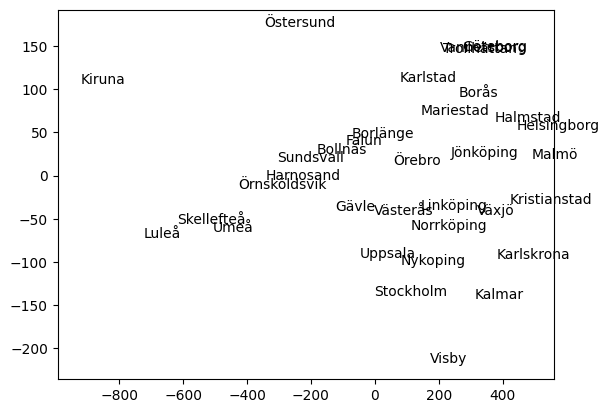

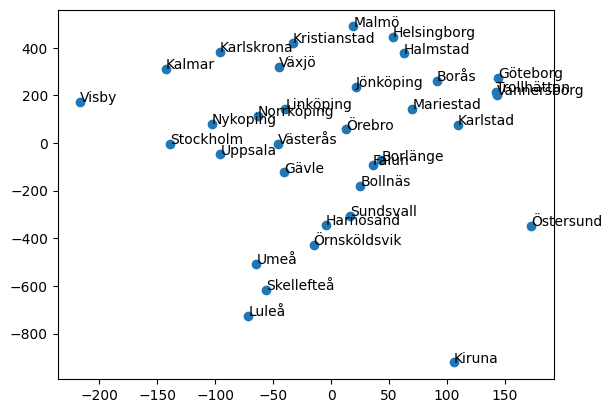

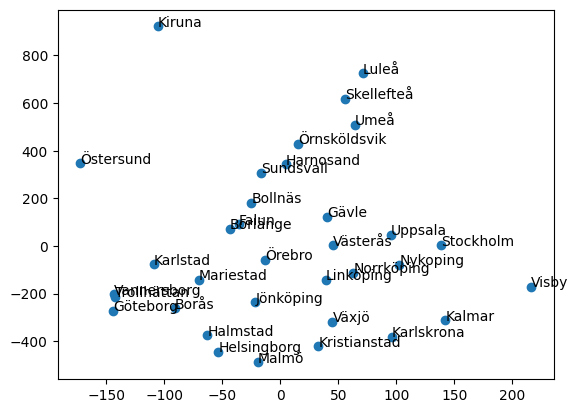

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Correct the module import


# Load the distance matrix and city names
distances = np.genfromtxt('city-distances-sweden.csv', delimiter=" ")  # Already loads as numpy array
names = np.genfromtxt('city-names-sweden.csv', delimiter='\n', dtype=str)


# * 1 Square the distances 

D = distances ** 2 


# * 2 Center the Distance Matrix

# Number of cities
n = D.shape[0]
# Create the centering matrix H
H = np.eye(n) - (1/n) * np.ones((n, n))


# * 3 Compute the centered matrix B = -1/2 * H * D * H

# Matrix multiplication 
B = -0.5 * H @ D @ H


# * 4. Extract the Coordinates
"""
np.linalg.eigh(B): Computes the eigenvalues and eigenvectors of the matrix B. 
The eigenvalues give information about the variance along each new axis (or dimension), 
and the eigenvectors provide the direction of these new axes in the lower-dimensional space.
"""
# Eigenvalue decomposition to get X (coordinates)
eigenvalues, eigenvectors = np.linalg.eigh(B)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1] # sorting in descending order
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Take the positive eigenvalues and corresponding eigenvectors
positive_eigenvalues = eigenvalues[eigenvalues > 0]
X = eigenvectors[:, eigenvalues > 0] @ np.diag(np.sqrt(positive_eigenvalues))

# X now contains the coordinates of the cities

# 4. Reduce to k dimensions (2D visualization)
k = 2
Z_k = X[:, :k]  # X[:, :k] instead of eigenvalues[:, :k]

# 5. Plot results
plt.figure()
plt.scatter(Z_k[:, 0], Z_k[:, 1], c='white')
for i, city in enumerate(names):
    plt.annotate(city, Z_k[i, :])

plt.figure()
plt.scatter(Z_k[:, 1], Z_k[:, 0])
for i, city in enumerate(names):
    plt.annotate(city, [Z_k[i, 1], Z_k[i, 0]])

plt.figure()
plt.scatter(-Z_k[:, 1], -Z_k[:, 0])
for i, city in enumerate(names):
    plt.annotate(city, [-Z_k[i, 1], -Z_k[i, 0]])

plt.show()
